# IntroStat Week 10

Welcome to the 10th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 10.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop



### Example: Normal approximation of binomial distribution

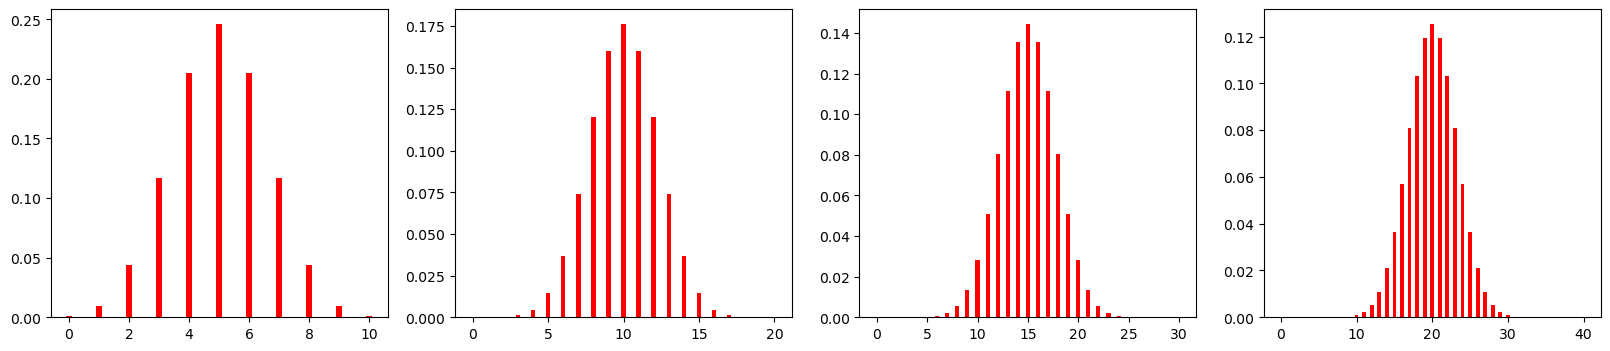

In [3]:

p = 1/2

fig, axs = plt.subplots(1, 4, figsize=(20,4))

# Plot binomial distribution for n = 10
n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')

# Plot binomial distribution for n = 20
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')

# Plot binomial distribution for n = 30
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')

# Plot binomial distribution for n = 40
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')

plt.show()

We see that the binomial for lager n looks more and more like a normal distribution.

But this is a little different if p not 1/2 - the binomial distribution is non-symmetric and therefore also less "normal" looking:

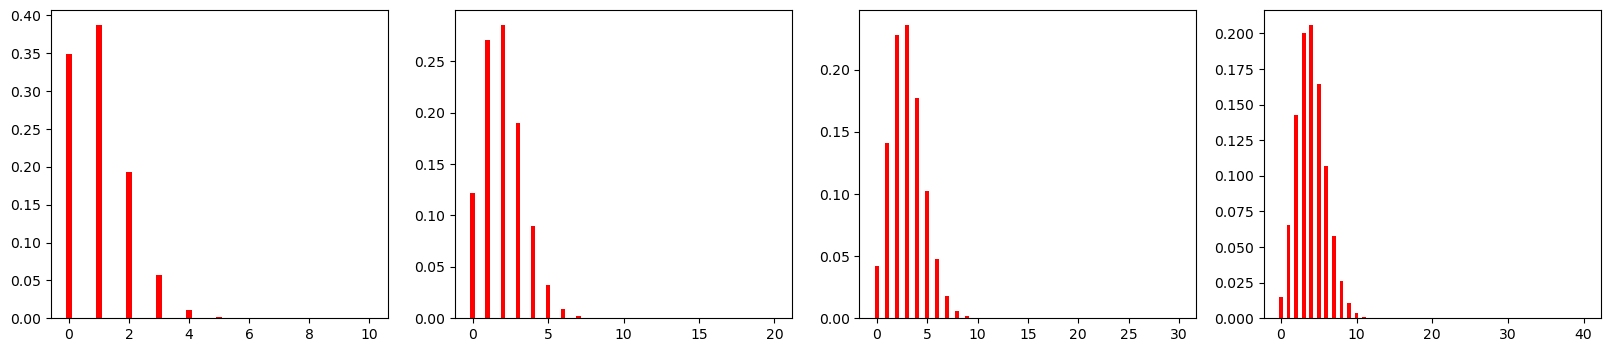

In [4]:
# Lets plot some binomialdistributions with p = 0.10 and increasing number of observation (n)

fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/10

# Again for n = 10,20,30,40
n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

We see the change when n increases, but is does not look normal - it is still asymmetric when n = 40 (right most plot)

What if we increase n even more?

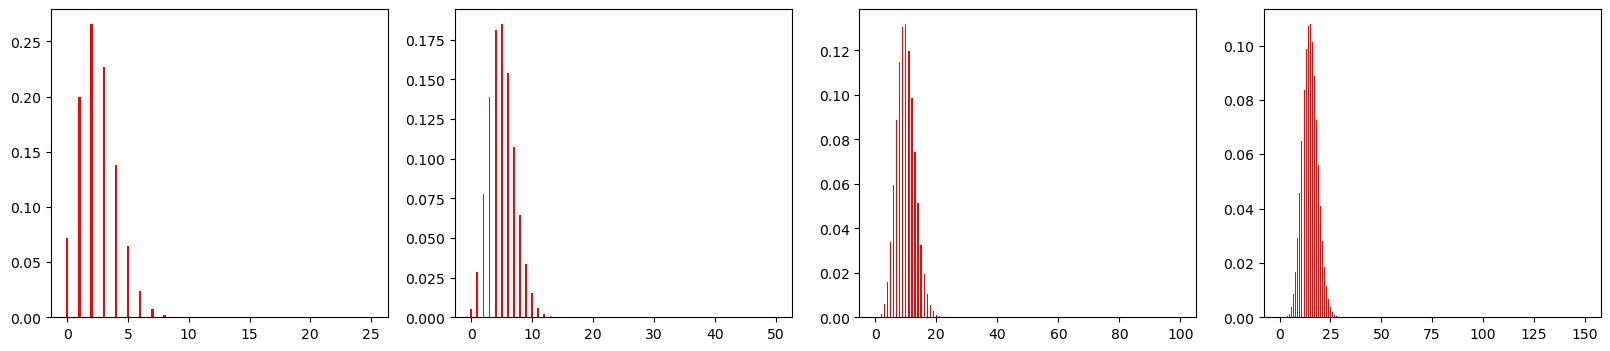

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/10

# plotting bimomial distributions for n = 25, 50, 100, 150
n = 25
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 50
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 100
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 150
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

Eventually (when n = 150) the distribution does look much more like a normal distribution.

Conclusion: the normal distribution is a good approximation is n is large enough - and "enough" depends on the value of p.

### Example: Confidence interval of proportion for left-handed

1. **Calculating Sample Proportion**:  Given a sample size of $ n = 100 $ people, with $ x = 10 $ left-handed individuals, what is the sample proportion of left-handed people in this sample?

$\hat{p}$ is the sample proportion, calculated as $ \hat{p} = \frac{x}{n} $.

In [6]:
n = 100  # total number of people in the sample
x = 10   # number of lefthanded in the sample

p_hat = x/n
print(p_hat)

0.1


2. **Calculating Standard Error**:  Using the sample proportion calculated, what is the standard error of the proportion for left-handed individuals in this sample?

$ \sigma_p $ is the standard error of the sample proportion, calculated as $ \sigma_p = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $.

In [7]:
# compute the standard error
se_p_hat = np.sqrt(p_hat*(1-p_hat)/n)
print(se_p_hat)

0.030000000000000002


3. **Calculating Confidence Interval** (assuming normal approximation):  Assuming a normal approximation, what is the 95% confidence interval for the proportion of left-handed individuals in the population, based on this sample?

$\hat{p} \pm z_{1-\alpha/2} \sigma_p$

where:
- $ \hat{p} $ is the sample proportion, calculated as $ \hat{p} = \frac{x}{n} $.
- $ z_{1-\alpha/2} $ is the critical value from the $ Z $-distribution for a confidence level of $ 1 - \alpha $.
- $ \sigma_p $ is the standard error of the sample proportion, calculated as $ \sigma_p = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $.
- Confidence level 95% (implying $ z_{1-\alpha/2} \approx 1.96 $ for a two-tailed interval.

In [8]:
# compute confidence-interval using normal-approximation
print([p_hat - 1.96*se_p_hat, p_hat + 1.96*se_p_hat])

[0.0412, 0.1588]


### Is it correct to use the normal approximation?

**Rule of thumb**  
Assume $ X \sim \text{bin}(n, p) $. The normal distribution is a good approximation for the binomial distribution <br>
if $ np \geq 15$ and <br>
if $ n(1 - p) \geq 15 $ <br>
that is, expected number of successes ($p$) and failures ($1-p$) are both at least 15.

In [ ]:
### is it CORRECT to use the normal approximation?
# is       np > 15 ?
# is   n(1-p) > 15 ?

print([n*p_hat, n*(1-p_hat)])

[10.0, 90.0]


These numbers are NOT both > 15

We should use another method for small samples

**"Plus 2" approach (Note 7.7)**

If the sample is not large, use $\tilde x= x+2$ and $\tilde n = n + 4$.

In the confidence interval, insert: 
$$
\tilde p \pm z_{1-\alpha/2} \, \, \sqrt{\tilde p(1-\tilde p)/\tilde n}
$$

In [19]:
# Alternative method for small samples ( Remark 7.7 in the book )

# "plus-2" method:

p_tilde = (x+2)/(n+4)

se_p_tilde = np.sqrt(p_tilde*(1-p_tilde)/(n+4))

print("Confidence Interval (using plus-2 approach):", [p_tilde - 1.96*se_p_tilde, p_tilde + 1.96*se_p_tilde])

print(f"Margin of Error: {1.96 * se_p_tilde:.4f}")

Confidence Interval (using plus-2 approach): [0.053981472743028336, 0.17678775802620245]
Margin of Error: 0.0614


## Sample Size needed to achieve a given precision

**Experiment planning: (1) When we have a reasonable guess for population proportion**  
How large does the sample size need to be to achieve a given precision?

**Method 7.13**  
If you want an expected (given) margin of error (ME) in a $ (1 - \alpha) $-confidence interval, the required sample size is:

$
n = p(1 - p) \left( \frac{z_{1 - \alpha / 2}}{\text{ME}} \right)^2
$

where $ p $ is a reasonable guess for the population proportion.

**Example Calculation in Python:**

Suppose we want to **determine the sample size** required for a 95% confidence level with a margin of error of 0.05 and an estimated population proportion $ p = 0.5 $.

In [25]:
import math

# Given values
p = 0.5  # estimated population proportion
z = 1.96  # z-value for 95% confidence
ME = 0.05  # margin of error

# Sample size calculation
n = p * (1 - p) * (z / ME) ** 2

print(f"Required sample size: {math.ceil(n)}")

# The required sample size is approximately 385.

Required sample size: 385


**Experiment planning: (2) When we DO NOT have a reasonable guess for population proportion**  
How large does the sample size need to be to achieve a given precision?

**Method 7.13**  
If you want an expected (given) margin of error (ME) in a $(1 - \alpha)$-confidence interval but do *not* have a reasonable guess of $ p $, the required sample size is:

$
n = \frac{1}{4} \left( \frac{z_{1 - \alpha/2}}{\text{ME}} \right)^2,
$

because the "worst case" is $ p = \frac{1}{2} $.

**Solution: Without assuming a guess for $ p $:**

$
n = \frac{1}{4} \left( \frac{1.96}{0.01} \right)^2 = 9604
$

In [29]:
import math

# Given values
p = 0.1  # estimated population proportion
z = 1.96  # z-value for 95% confidence
ME = 0.01  # margin of error

# Sample size calculation, when we can estimate
n = p * (1 - p) * (z / ME) ** 2

print(f"Required sample size: {math.ceil(n)}")

# Sample size calculation, without the best guess or estimate
n = 1/4 * (z / ME) ** 2

print(f"Required sample size: {math.ceil(n)}")

Required sample size: 3458
Required sample size: 9604




### Example: Hypothesis test for proportion of left-handed

**Are half of all Danish citizens left-handed?**

We want to test if the true proportion could be $p_0 = 0.50$ (50:50 left and right-handed people)

In [21]:
z_obs,p_value = smprop.proportions_ztest(count=10, nobs=100, value=0.5, prop_var=0.5) 
# We want the proportion variance to be based on the proportion under the null hypothesis (prop_var = 0.5, As default we want to input this)
# Otherwise the function as default uses the proportion from the sample to estimate the variance

print(z_obs, p_value)

-8.0 1.244192114854348e-15


$
z_{\text{obs}} = \frac{\hat{p} - p_0}{\sqrt{p_0(1 - p_0) / n}}
$

In [31]:
# We can also calculate z_obs *manually*:

z_obs = (0.10 - 0.50)/np.sqrt(0.50*(1-0.50)/100)

print(z_obs)

-8.0


In [ ]:
# we can also find the p-value *manually*:

print(f"p-value: {2 * stats.norm.cdf(z_obs, loc=0, scale=1):.4f}")

# without showing only four decimal places
print(f"p-value: {2 * stats.norm.cdf(z_obs, loc=0, scale=1)}")

p-value: 0.0000
p-value: 1.244192114854348e-15


### Example: Contraceptive pills and risk of blood clots

In [39]:
# Group using birth control pills:
x1 = 23
n1 = 23 + 34
p1 = x1/n1
print(p1)

0.40350877192982454


In [40]:
# Group not using birth control pills (control group):
x2 = 35
n2 = 35 + 132
p2 = x2/n2
print(p2)

0.20958083832335328


In [41]:
# difference between groups:
diff = p1-p2
print(diff)

0.19392793360647126


In [42]:
# confidence interval for diff:
se_diff = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

print([diff - 1.96*se_diff, diff + 1.96*se_diff])

[0.05239234287574965, 0.33546352433719284]


In [26]:
###### Test for equal proportions in the two groups:
# We saw from the interval above that 0.5 was not in the interval. So what do we expect here?

z_obs,p_value = smprop.proportions_ztest(count = [23, 35], nobs = [57, 167], value=0, prop_var=0)
print(z_obs, p_value)

2.8859712586466184 0.003902077897925701


**Hypothesis Test for Two Proportions**  
When comparing two proportions (shown here for a two-sided alternative hypothesis):

$
H_0 : \; p_1 = p_2,
$
$
H_1 : \; p_1 \neq p_2.
$

**Use the test statistic**

$
z_{\text{obs}} = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}},
$
where $\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$.

In [45]:
# *Manual* calculations for the same test: 
p_pooled = (x1+x2)/(n1+n2)
print("p_hat or p_pooled:", p_pooled)

p_hat or p_pooled: 0.25892857142857145


In [50]:
# test statistic
z_obs = diff / np.sqrt(p_pooled*(1-p_pooled)*(1/n1 + 1/n2))
print("Test statistic or z_obs:", z_obs)

Test statistic or z_obs: 2.8859712586466184


In [ ]:
# p-value
print("p-value:", 2 * stats.norm.cdf(-z_obs, loc=0, scale=1))

# Very Strong Evidence (p < 0.001), Z-score > 3.291 (two-tailed)
# Strong Evidence (0.001 ≤ p < 0.01), Z-score between 2.576 and 3.291 (two-tailed)
# Moderate Evidence (0.01 ≤ p < 0.05), Z-score between 1.96 and 2.576 (two-tailed)
# Weak Evidence (0.05 ≤ p < 0.10), Z-score between 1.645 and 1.96 (two-tailed)
# No Evidence (p ≥ 0.10), Z-score < 1.645 (two-tailed)

p-value: 0.003902077897925702


### Example: Contraceptive pills with $\chi^2$

In [51]:
# The data in a table:
table_data = np.array([[23,35],[34,132]])
print(table_data)
pill_study = pd.DataFrame(table_data, index=['Blood Clot', 'No Clot'], columns=['Pill', 'No pill'])
# With pandas we can make a nicer table:
display(pill_study)

[[ 23  35]
 [ 34 132]]


Pill  No pill
Blood Clot    23       35
No Clot       34      132

In [53]:
# this function can take either a pandas table or the data (so both table_data and pill_study)
chi2, p_val, dof, (expected) = stats.chi2_contingency(pill_study, correction=False)
# returns test statistic, p-value, degrees of freedom, and expected frequencies

In [54]:
print(expected) # expected frequencies under the null hypothesis

[[ 14.75892857  43.24107143]
 [ 42.24107143 123.75892857]]


In [55]:
print("Chai-square test statistic:", chi2)

Chai-square test statistic: 8.328830105734347


In [56]:
print("P-value:", p_val)

P-value: 0.0039020778979257016


In [57]:
print(dof)

1


### Example: Candidate votes over time

In [60]:
# First put data into a pandas dataframe
poll = np.array([[79, 91, 93], [84, 66, 60], [37, 43, 47]])
print(poll)
poll_df = pd.DataFrame(poll, index=['Cand1', 'Cand2', 'Undecided'], columns = ['4 weeks', '2 weeks', '1 week'])
display(poll_df)

[[79 91 93]
 [84 66 60]
 [37 43 47]]


4 weeks  2 weeks  1 week
Cand1           79       91      93
Cand2           84       66      60
Undecided       37       43      47

Row 1: votes for Candidate 1 (4, 2 and 1 week(s) before the election) <br>
Row 1: votes for Candidate 2 (4, 2 and 1 week(s) before the election) <br>
Row 1: undecided votes       (4, 2 and 1 week(s) before the election) <br>

In [61]:
# calculate total number of people asked at every sample / timepoint:
print(np.sum(poll, axis=0))

[200 200 200]


In [62]:
# total number for each candidate across all three timepoints:
print(np.sum(poll, axis=1))

[263 210 127]


This is the overall distribution of votes. 

We want to know if the distributions of votes within each timepoint (sample) differs significantly from the overall distribution.

In [63]:
# Now do chi2 test:
# Again, we can use either the data or the pandas dataframe as input 
chi2, p_val, dof, expected = stats.chi2_contingency(poll, correction=False)

In [64]:
print(expected) # Expected under the assumptions that the null hypothesis is true (all are the same)

[[87.66666667 87.66666667 87.66666667]
 [70.         70.         70.        ]
 [42.33333333 42.33333333 42.33333333]]


In [65]:
print(chi2)

6.961978041718169


In [66]:
print(p_val)

0.1379112060673381


In [67]:
print(dof)

4
